<img style="float:left" width="40%" src="pics/Universidad Burgos.png">
<img style="float:right" width="16%" src="pics/person1_bacteria_2.jpeg">

<br style="clear:both;">

# Trabajo Fin de Grado

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">NOMBRE TFG</h2>

### Nuria Martínez Queralt

### Grado en Ingeniería de la Salud 


En este notebook se han llevado a cabo una serie de tareas para la realización del TFG, el cual consiste en la identificación de neumonía a partir de radiografías de tórax empleando una red neuronal. Para esto, se deben probar distintos modelos hasta llegar al modelo más óptimo de red neuronal para este caso.

## Redistribución de las imágenes

Debido a que la distribución inicial obtenida a partir del dataset descargado de internet: "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia" incluye únicamente 16 imágenes en la carpeta de validación ("val") y, esto supone un problema para la obtención de buenos resultados a la hora de construir nuestra red neuronal, antes de empezar a trabajar con las imágenes, se debe crear una función para obtener un nuevo dataset con nuevas carpetas "train", "test" y "val" y una nueva distribución de las imágenes.

In [1]:
import os

def buscar_imagen(directorio_padre, nombre_imagen):
    '''
    Función empleada para encontrar una imagen concreta (a partir de su nombre) dentro de cualquiera de las subcarpetas del directorio_padre.
    ---------------------------------------------------------
    Parámetros:
    - directorio_padre: ruta donde se encuentra la carpeta principal con cada una de las subcarpetas con las imágenes de radiografías de tórax
    - nombre_imagen: nombre de la imágen a la que se desea acceder 
    ----------------------------------------------------------
    Return:
    - ruta_imagen: ruta completa de la imágen a la que se desea acceder 
    '''
    # Subcarpetas principales en las que buscar
    subcarpetas_principales = ['train', 'test', 'val']
    # Subcarpetas adicionales en las que buscar dentro de cada subcarpeta principal (donde se encuentran las imágenes)
    subcarpetas_adicionales = ['NORMAL', 'PNEUMONIA']

    # Se itera sobre las subcarpetas principales
    for subcarpeta_principal in subcarpetas_principales:
        # Se itera sobre las subcarpetas adicionales dentro de cada subcarpeta principal
        for subcarpeta_adicional in subcarpetas_adicionales:
            # Se obtiene la ruta completa de la imagen
            ruta_imagen = os.path.join(directorio_padre, subcarpeta_principal, subcarpeta_adicional, nombre_imagen)
            # verificar si la imagen existe en la subcarpeta actual
            if os.path.exists(ruta_imagen):
                return ruta_imagen  # devolver la ruta de la imagen si se encuentra

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil

def redestribucion_imagenes(directorio_principal):

    '''
    Función empleada para redistribuir las imágenes ubicadas en distintas subcarpetas dentro de la carpeta data en una carpeta nueva con las
    mismas subcarpetas pero con un porcentaje distinto de imágenes en cada subcarpeta. La distribución quedaría de la siguiente manera:
    - test: 20% del total
    - train: 64% del total
    - val: 16% del total
    De igual forma, la distribución de las carpetas "PNEUMONIA" y "NORMAL" también queda de forma proporcional.
    --------------------------------------------------------------------
    Parámetros:
    - directorio_principal: ruta donde se encuentra la carpeta data con cada una de las subcarpetas con las imágenes de radiografías de tórax
    -------------------------------------------------------------------
    Return: 
    - nada
    '''

    '''
    En primer lugar, se crea un csv con dos columnas ''nombres_ficheros'' y ''clases'' compuesto por todas las imágenes existentes en el directorio_padre.
    En la columna ''nombres_ficheros'', debe aparecer el nombre de TODAS las imágenes que existen dentro de cada subcarpeta y en la columna ''clases'',
    debe aparecer 0 o 1 en función si se trata de una imagen de la carpeta NORMAL o PNEUMONIA respectivamente.
    '''

    directorio_padre = os.path.join(directorio_principal, 'data') #se accede a la ruta de la carpeta data
    
    # Listas vacias para almacenar los nombres de las imágenes y las clases (0 o 1 en función de si es normal o neumonía respectivamente)
    nombres_ficheros = []
    clases = []
    
    # Se recorren las carpetas de train, test y val
    for subcarpeta in ['train', 'test', 'val']:
        ruta_subcarpeta = os.path.join(directorio_padre, subcarpeta) #ruta a cada una de las subcarpetas
        for clase in ['NORMAL', 'PNEUMONIA']:
            ruta_clase = os.path.join(ruta_subcarpeta, clase) #ruta a cada una de las clases dentro de las subcarpetas
            for nombre_fichero in os.listdir(ruta_clase):
                nombres_ficheros.append(nombre_fichero)
                clases.append(0 if clase == 'NORMAL' else 1)
    
    # Se crea el DataFrame con los datos
    df_todas = pd.DataFrame({'nombre_fichero': nombres_ficheros,'clase': clases})
    
    # Se guarda el DataFrame en un archivo CSV dentro de la carpeta creada ''Datos''
    ruta_datos=os.path.join('.', 'Datos') #se crea la ruta a la nueva carpeta ''Datos'' en el directorio actual
    os.makedirs(ruta_datos, exist_ok=True) # se crea la nueva carpeta si esta no existe
    ruta_csv = os.path.join(ruta_datos, 'dataset_info.csv') #el nuevo dataframe se guarda dentro del directorio padre
    df_todas.to_csv(ruta_csv, index=False, encoding='utf-8')

    '''
    A partir del csv anterior y, con ayuda de la función ''train_test_split'' de skitlearn, se divide el csv anterior en dos 
    subgrupos de train y test en proporción 80, 20 para poder usar el 80% de las imágenes para train y el 20% para test.
    También se emplea el parámetro ''stratify'' para que exista una proporción de clases en cada uno de los grupos, es decir, en ''NORMAL" y "PNEUMONIA".
    '''
    
    # random_state=42 se emplea para que cada vez que se ejecute el código, se obtenga la misma división de datos. El valor 42 es un valor que se usa
    # comunmente en este caso pero se puede emplear cualquie otro valor entero.
    train_df, test_df = train_test_split(df_todas, test_size=0.2, stratify=df_todas['clase'], random_state=42)
    
    # Se guardan los nuevos conjuntos de datos en archivos CSV dentro de la carpeta ''Datos''
    ruta_train_csv = os.path.join(ruta_datos, 'train_dataset_info.csv') #el nuevo dataframe se guarda dentro de la carpeta Datos
    ruta_test_csv = os.path.join(ruta_datos, 'test_dataset_info.csv') #el nuevo dataframe se guarda dentro de la carpeta Datos
    train_df.to_csv(ruta_train_csv, index=False, encoding='utf-8')
    test_df.to_csv(ruta_test_csv, index=False, encoding='utf-8')

    '''
    A continuación, se coge el conjunto de datos obtenido previamente de train, es decir, el csv "train_df" y se repite el mismo
    proceso pero, esta vez dividiendo este conjunto de datos para train y val en un 80% y 20% respectivamente.
    De tal forma que, finalemnte se obtenga el conjunto de test que represeneta el 20% del total (obtenido previamente), el conjunto de train
    que representa el 80% del 80% del total ya que, inicialmente nos hemos quedado con el 80% pero luego, de este 80%, el 20% va destinado al conjunto
    de validación. Por lo que, finalmete quedarían distribuidos de la siguiente manera:
    - test: 20% del total
    - train: 64% del total
    - val: 16% del total
    '''

    # Se emplea train_test_split para dividir el conjunto de datos de entrenamiento en train (80%) y val (20%)
    train_def_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['clase'], random_state=42)
    
    # Se guardan los nuevos conjuntos de datos en archivos CSV dentro de la carpeta ''Datos''
    ruta_train_final_csv = os.path.join(ruta_datos, 'train_final_dataset_info.csv') #el nuevo dataframe se guarda dentro de la carpeta ''Datos''
    ruta_val_csv = os.path.join(ruta_datos, 'val_dataset_info.csv') #el nuevo dataframe se guarda dentro de la carpeta ''Datos''
    train_def_df.to_csv(ruta_train_final_csv, index=False, encoding='utf-8')
    val_df.to_csv(ruta_val_csv, index=False, encoding='utf-8')

    '''
    Finalmente, se crea una nueva carpeta denominada data_nuevo dentro del directorio principal. Dentro de esta carpeta se crean 3 subcarpetas 
    ("train", "test" y "val") que corresponderian con los dataframes obtenidos hasta ahora: train_def_df, val_df y test_df y, dentro de estas 3 
    subcarpetas, se crean 2 carpetas "NORMAL" y "PNEUMONIA" que corresponden con las clases determinadas en cada dataframe, 0 en caso de 
    "NORMAL" y 1 para "PNEUMONIA". Dentro de estas dos carpetas para ("train", "test" y "val") se encontrarán las imagenes correspondientes 
    para cada caso según los dataframes obtenidos.
    
    La función ''os.makedirs'', verifica si la carpeta ruta_subcarpeta ya existe. Si existe, no se hace nada y el programa continúa su ejecución 
    sin lanzar un error. Si no existe, la función os.makedirs() la crea junto con cualquier carpeta intermedia necesaria en la ruta especificada.
    '''

    # Se crea la nueva carpeta dentro del directorio principal
    ruta_principal_nueva = os.path.join(directorio_principal, 'data_nuevo') 

    # Se crean las carpetas 'train', 'test' y 'val' dentro de la nueva carpeta principal
    for subcarpeta in ['train', 'test', 'val']:
        ruta_subcarpeta = os.path.join(ruta_principal_nueva, subcarpeta)
        os.makedirs(ruta_subcarpeta, exist_ok=True) 
        
        # Se crean las subcarpetas 'NORMAL' y 'PNEUMONIA' dentro de cada subcarpeta ('train', 'test' y 'val')
        for clase in ['NORMAL', 'PNEUMONIA']:
            ruta_clase = os.path.join(ruta_subcarpeta, clase)
            os.makedirs(ruta_clase, exist_ok=True)
    
                
    # Se copian los archivos CSV a las subcarpetas correspondientes
    for df, nombre_carpeta in [(train_def_df, 'train'), (val_df, 'val'), (test_df, 'test')]:
        for index, row in df.iterrows(): #se itera sobre cada dataframe fila a fila
            clase = 'NORMAL' if row['clase'] == 0 else 'PNEUMONIA'
            nombre_archivo = row['nombre_fichero']
    
            # ruta de origen donde se busca la imagen concreta a partir de la función realizada previamente
            # esta ruta se refiere a donde esta la imagen que se desea guardar en la carpeta destino originalmente para poder copiarla
            ruta_origen=buscar_imagen(directorio_padre, nombre_archivo)
            
            # ruta donde se desa guardar (y redestribuir de la forma correcta) las imágenes
            ruta_destino = os.path.join(ruta_principal_nueva, nombre_carpeta, clase, nombre_archivo)
            
            shutil.copyfile(ruta_origen, ruta_destino) # copia las imágenes de la ruta incial a la ruta final
    

In [3]:
directorio_principal = 'C:/Users/nuria/Downloads/TFG' #ruta donde se encuentra la carpeta data en mi caso y donde se va a crear la nueva carpeta data_nuevo
redestribucion_imagenes(directorio_principal)

A partir de aqui, se va a trabajar con la nueva carpeta de imágenes y su nueva distribución para evitar errores

## Preparación del modelo

Se prepara el modelo para poder trabajar con las imágenes de train, test y val

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import keras
from keras import layers

def preparar_modelo(ruta, batch_size,target_size):

    '''
    Función que configura los generadores de datos para entrenar, validar y probar un modelo de aprendizaje automático con imágenes.
    -----------------------------------------------------------
    Parámetros:
    - ruta: str. Ruta base donde se encuentran las imágenes organizadas en subcarpetas (train, val, test). Ruta data_nuevo.
    - batchsize: int. Tamaño del lote que se utiliza en una única iteración del algoritmo de aprendizaje
    - target_size: tupla de números enteros que representa el alto y ancho al que se van a redimensionar todas las imágenes. Este valor deberá coincidir
    con el input_shape empleado posteriormente dependiendo de cada caso.
    ----------------------------------------------------
    Return:
    - nada
    '''
    
    dir_general = ruta 
    
    dir_train = os.path.join(dir_general, 'train') # se accede a la ruta concreta de la carpeta ''train'' dentro de data_nuevo
    dir_validation = os.path.join(dir_general, 'val') # se accede a la ruta concreta de la carpeta ''val'' dentro de data_nuevo
    dir_test = os.path.join(dir_general, 'test') # se accede a la ruta concreta de la carpeta ''test'' dentro de data_nuevo
    
    # Preprocesamiento de imágenes
    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen=ImageDataGenerator(rescale=1./255)
    
    #Iterador que recorre el directorio de imágenes del conjunto de entrenamiento
    train_generator = train_datagen.flow_from_directory(
        dir_train,
        target_size=target_size, 
        batch_size=batch_size, 
        color_mode='rgb',
        class_mode='binary', #clase binaria
        classes=['NORMAL','PNEUMONIA'], #se indican las clases
        shuffle=True) # el conjunto de datos se barajará aleatoriamente para evitar sobreajuste 

    #Iterador que recorre el directorio de imágenes del conjunto de validación
    validation_generator = validation_datagen.flow_from_directory(
        dir_validation,
        target_size=target_size, 
        batch_size=batch_size, 
        color_mode='rgb',
        class_mode='binary', #clase binaria
        classes=['NORMAL','PNEUMONIA'], #se indican las clases
        shuffle=False) 

    #Iterador que recorre el directorio de imágenes del conjunto de prueba
    test_generator = test_datagen.flow_from_directory(
        dir_test,
        target_size=target_size, 
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='binary', #clase binaria
        classes=['NORMAL','PNEUMONIA'], #se indican las clases
        shuffle=False) 
    
    return train_generator, validation_generator, test_generator


    


In [ ]:
# Ejemplo de uso
ruta='C:/Users/nuria/Downloads/TFG/data_nuevo' #directorio donde se encuentra la nueva carpeta creada con las imágenes
batch_size=20 #ejemplo de batch size
target_size=(340,340) #ejemplo de target_size

train_generator, validation_generator, test_generator = preparar_modelo(ruta, batch_size, target_size)

## Creación de métricas

Se crea una función para calcular las distintas métricas que servirán para la posterior evaluación de cada modelo que se realice.

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import numpy as np 

def metricas(y_test, y_pred):
    '''
    Función que calcula distintas métricas para la evaluación del modelo.
    -----------------------------------------------------
    Parámetros: 
    - y_test: array de etiquetas verdaderas del conjunto de prueba
    - y_pred: array de etiquetas predichas por el modelo
    ----------------------------------------
    Return: 
    - accuracy: float que indica la proporción de predicciones correctas
    - precision: float que indica la proporción de predicciones positivas correctas
    - recall: float que indica la proporción de positivos detectados
    - f1: float que indica la media armónica de precisión y exhaustividad para evaluar de una forma más equilibrada el rendimiento del modelo
    - specificity: float que indica la proporción de negativos detectados
    - fpr: float que indica la tasa de falsos positivos, es decir, la proporción de negativos incorrectamente clasificadas como positivos, 
    respecto al total de casos negativos reales.
    - fnr: float que indica la tasa de falsos negativos, es decir, la proporción de positivos incorrectamente clasificadas como negativos, 
    respecto al total de casos positivos reales.
    - auc: float que se emplea para evaluar la capacidad de distinción entre clases positivas y negativas de un modelo de clasificación 
    binaria. Un 1 significa que es capaz de distinguir perfectamente entre clases, un 0.5 significa una clasificación aleatoria y un 0 indica 
    que ninguna clase ha sido correctamente clasificada.
    '''
    
    y_pred_bin=np.where(y_pred>=0.5,1,0) #para convertirlo en un problema binario
    
    #Se obtienen los verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos a partir de la matriz de confusión 
    #con .ravel() se convierte la matriz en un array unidimensional
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_bin).ravel() 

    #Se calculan cada una de las métricas empleando su correspondiente fórmula
    accuracy = (tp + tn)/(tn + fp + fn + tp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * ((precision*recall)/(precision+recall))
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn) #tasa de falsos positivos
    fnr = fn / (fn + tp) #tasa de falsos negativos
    auc = roc_auc_score(y_test, y_pred)

    
    return [accuracy, precision, recall, f1, specificity, fpr, fnr, auc] #se devuleve como una lista para poder trabajar correctamente con las métricas


    


In [ ]:
# Ejemplo de uso
y_test=test_generator.labels
y_pred=model.predict(test_generator)

In [ ]:
metricas(y_test, y_pred)

## Realización de arquitectura CNN propia

Antes de realizar la comparación entre distintas arquitecturas y distintos batch_size, se han establecido diferentes modelos de arquitectura de red neuronal variando las capas, el número de capas, etc a partir de una red neuronal convolucional (CNN) propia realizada a partir del siguinete link: ''https://www.kaggle.com/code/paola311/clasificaci-n-de-im-genes-cnn''. Se trata de una arquitectura CNN comunmente aplicada como punto de partida para la clasificacion de imágenes.

In [6]:
#arquitectura CNN propia

def establecer_arquitectura_propia(tipo):

    '''
    Función que establece tres tipos de modelos de red neuronal convolucional (CNN) a partir de una CNN propia.
    --------------------------------------------------------------
    Parámetros
    - tipo: str que indica el tipo de modelo al que se quiere acceder 
    -------------------------------------------------------------
    Return
    -model: modelo sequencial en keras según el tipo que se haya introducido como parámetro de entrada y que contiene toda la información necesaria 
    sobre la arquitectura del modelo
    '''
    
    input_shape=(150,150,3) # se define el tamaño de entrada de las imágenes

    '''
    El modelo Simple1, se corresponde con un modelo que posee varias capas convolucionales (con las que se obtienen características importantes
    de las imágenes) seguidas de capas de MaxPooling2D para reducir la dimensionalidad. Después del Flatten se encuentra una capa densa.
    La función de activación sigmoide en la capa de salida produce una probabilidad entre 0 y 1 para la clasificación binaria.
    Este modelo es muy simple y, se sabe de antemano que los resultados no van a ser buenos pero sirve de punto de partida.
    '''
    
    
    if tipo == "Simple1":
        model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(), #convierte imágenes en vectores
                layers.Dropout(0.2), 
                layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
            ]
        )
        
        '''
    El modelo Simple2, se corresponde con un modelo que posee varias capas convolucionales (con las que se obtienen características importantes
    de las imágenes) seguidas de capas de MaxPooling2D para reducir la dimensionalidad. Después del Flatten se encuentra una capa oculta de 
    100 unidades y una capa densa.
    La función de activación sigmoide en la capa de salida produce una probabilidad entre 0 y 1 para la clasificación binaria.
    '''

    elif tipo == "Simple2":
        model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(), #convierte imágenes en vectores
                layers.Dense(100, activation="relu"), #100 neuronas en la capa oculta
                layers.Dropout(0.2),
                layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
            ]
        )
        '''
    El modelo Simple3, se corresponde con un modelo que posee varias capas convolucionales (con las que se obtienen características importantes
    de las imágenes) seguidas de capas de MaxPooling2D para reducir la dimensionalidad. Después del Flatten se encuentra una capa se encuentra 
    una capa oculta de 100 neuronas, una segunda capa oculta de 16 neuronas y una capa densa.
    La función de activación sigmoide en la capa de salida produce una probabilidad entre 0 y 1 para la clasificación binaria.
    '''

    elif tipo == "Simple3":
        model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(), #convierte imágenes en vectores
                layers.Dense(100, activation="relu"), #100 neuronas en la primera capa
                layers.Dropout(0.2),
                layers.Dense(16, activation="relu"), #16 neuronas en la segunda capa
                layers.Dropout(0.2),
                layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
            ]
        )
    else: #si no se cumple ninguna de las opciones anteriores, aparece un error
        raise ValueError("Tipo de arquitectura no reconocida")
    
    return model 




In [7]:
establecer_arquitectura_propia('Simple1')

## Realización de arquitectura CNN AlexNet

Se ha repetido el mismo procedimiento, pero, esta vez con una CNN basada en el modelo de AlexNet para poder comprobar cual funciona mejor

In [8]:
#arquitectura CNN alexaNet
def establecer_arquitectura_AlexaNet(tipo):

    '''
    Función que establece distintos tipos de modelos de red neuronal convolucional (CNN) a partir de la CNN de alexNet.
    --------------------------------------------------------------
    Parámetros
    - tipo: str que indica el tipo de modelo al que se quiere acceder 
    -------------------------------------------------------------
    Return
    -model: modelo sequencial en keras según el tipo que se haya introducido como parámetro de entrada y que contiene toda la información necesaria 
    sobre la arquitectura del modelo
    '''
    
    input_shape=(340,340,3) # se define el tamaño de entrada de las imágenes

    '''
    El modelo Simple1, se corresponde con un modelo que posee cinco capas convolucionales (con las que se obtienen características importantes
    de las imágenes). La primera, segunda y quinta están seguidas de una capa de MaxPooling2D para reducir la dimensionalidad. 
    Después del Flatten se encuentra una capa densa.
    La función de activación sigmoide en la capa de salida produce una probabilidad entre 0 y 1 para la clasificación binaria.
    Este modelo es muy simple y los resultados no van a ser buenos pero sirve de punto de partida.
    '''

    
    if tipo == "Simple1":
        model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Flatten(), #convierte imágenes en vectores
                layers.Dropout(0.2), 
                layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
            ]
        )
        
        '''
    El modelo Simple2, se corresponde con un modelo que posee cinco capas convolucionales (con las que se obtienen características importantes
    de las imágenes). La primera, segunda y quinta están seguidas de una capa de MaxPooling2D para reducir la dimensionalidad.
    Después del Flatten se encuentra una capa oculta de 100 unidades y una capa densa.
    La función de activación sigmoide en la capa de salida produce una probabilidad entre 0 y 1 para la clasificación binaria.
    '''

    elif tipo == "Simple2":
        model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Flatten(), #convierte imágenes en vectores
                layers.Dense(100, activation="relu"), #100 neuronas en la capa oculta
                layers.Dropout(0.2),
                layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
            ]
        )
        '''
    El modelo Simple3, se corresponde con un modelo que posee cinco capas convolucionales (con las que se obtienen características importantes
    de las imágenes). La primera, segunda y quinta están seguidas de una capa de MaxPooling2D para reducir la dimensionalidad. 
    Después del Flatten se encuentra una capa se encuentra una capa oculta de 100 neuronas, una segunda capa oculta de 16 neuronas y una capa densa.
    La función de activación sigmoide en la capa de salida produce una probabilidad entre 0 y 1 para la clasificación binaria.
    '''

    elif tipo == "Simple3":
        model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Flatten(), #convierte imágenes en vectores
                layers.Dense(100, activation="relu"), #100 neuronas en la primera capa
                layers.Dropout(0.2),
                layers.Dense(16, activation="relu"), #16 neuronas en la segunda capa
                layers.Dropout(0.2),
                layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
            ]
        )
    else: #si no se cumple ninguna de las opciones anteriores, aparece un error
        raise ValueError("Tipo de arquitectura no reconocida")
    
    return model 


In [9]:
establecer_arquitectura_AlexaNet("Simple1")

## Comparación de distintas arquitecturas de modelo y distintos batch_size con CNN propia

Se crean dos funciones distintas (una para CNN propia y otra para CNN alexNet) para poder realizar una comparación entre distintas arquitecturas y distintos batch_size entrenando y evaluando los modelos generados con distintas arquitecturas y distintos batch sizes. Para realizar la comparación, se emplea la función de obtención de métricas previamente definida.

In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import keras
from keras import layers

import pandas as pd
from keras.callbacks import EarlyStopping

def arq_batch_propia(ruta,epochs,batch_sizes,modelos,target_size, nombre_carpeta_hist, nombre_carpeta_resultados, nombre_carpeta_modelos):
    '''
    Función que entrena distintas arquitecturas de modelo y distintos batch size introducidos como parámetros a partir de la CNN propia 
    establecida previamente y devuelve una tabla comparativa con los distintos valores de métricas para cada caso.
    También guarda en distintas carpetas los historicos con las métricas obtenidas tras cada entrenaminto para
    cada modelo, los distintos modelos obtenidos según la arquitectura y el batch size y el dataframe final en formato csv.
    ----------------------------------------------------
    Parámetros:
    - ruta: str. Ruta base donde se encuentran las imágenes organizadas en subcarpetas (train, val, test). Ruta data_nuevo
    - epochs: int. Número de épocas a entrenar 
    - batch_sizes: lista con los distintos valores de batch size para probar en cada entrenamiento
    - modelos: lista de nombres de cada uno de los modelos que se van a comparar obtenidos partir de la función realizada previamente 
    - target_size: tupla de números enteros que representa el alto y ancho al que se van a redimensionar todas las imágenes. En este caso deberá ser 
    (150,150) para coincidir con el input_shape del modelo de CNN propia.
    - nombre_carpeta_hist: str. Nombre de la carpeta creada para guardar los csv de los históricos
    - nombre_carpeta_resultados: str. Nombre de la carpeta creada para guardar el dataframe final en formato csv.
    - nombre_carpeta_modelos: str. Nombre de la carpeta creada para guardar los distintos modelos
    --------------------------------------------------
    Return:
    - compara_arqu_batch_def: dataframe que contiene como índice las columnas referidas al modelo de arquitectura y al valor de batch size. El dataframe 
    obtenido se observa como una tabla comparativa de diversas métricas para cada arquitectura y cada batch size.
    '''
    
    #se inicializa un dataframe vacío donde, posteriormente se van a añadir todos los componentes necesarios para comparar los distintos 
    #modelos de arquitectura para distintos batch size (comparando las métricas)
    compara_arqu_batch=pd.DataFrame()
    

    #bucle en el que se recorren cada uno de los modelos y los tamaños de batch_size introducidos como parámetro
    for modelo in modelos:
        print(f"Comparando modelo {modelo}...")
        for batch_size in batch_sizes:
            print(f"Entrenando modelo {modelo} y batch_size {batch_size}")
    
            #se emplea la función preparar_modelo para configurar los generadores de datos para entrenar, validar y probar 
            #un modelo de aprendizaje automático con imágenes
            train_generator, validation_generator, test_generator = preparar_modelo(ruta, batch_size,target_size)
            
            #se emplea la función establecer_arquitectura para determinar el modelo con el que se trabaja cada vez
            model = establecer_arquitectura_propia(modelo)
            
            #se compila el modelo y se calculan las métricas con las que se quiere trabajar
            #en este caso, en la función de pérdida "loss", se emplea la entropía cruzada binaria "binary_crossentropy" ya que se trata de 
            #un problema de clasificación binaria
            model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy","Recall","AUC"]) 
    
            #ENTRENAMIENTO DEL MODELO
            # con callbacks se detiene el entrenamiento si la pérdida en el conjunto de validación no mejora después de 10 épocas (patience)
            history=model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=EarlyStopping(monitor='val_auc', patience=10,restore_best_weights=True))
            historico = pd.DataFrame(history.history)
            print(historico) 

            #SE GUARDAN LOS DISTINTOS HISTÓRICOS EN UNA CARPETA
            #se guarda el historico en un csv para guardar los valores de entrenamiento y validación (accuracy, recall, val_auc, val_los...)
            ruta_historicos = os.path.join('.', nombre_carpeta_hist) #se crea la ruta a la nueva carpeta de Historicos en el directorio actual
            os.makedirs(ruta_historicos, exist_ok=True) # se crea la nueva carpeta si esta no existe
            #se crea la ruta a la subcarpeta dentro de la nueva carpeta de modelos
            subcarpeta_historicos = os.path.join(ruta_historicos,'historico_propia_arqu_batchsize') 
            os.makedirs(subcarpeta_historicos, exist_ok=True) # se crea la nueva subcarpeta si esta no existe
            nombre_historico = f'hist_propia_{modelo}_{batch_size}.csv' #se define el nombre que van a tener cada uno de los csv donde esta el historico correspondiente
            ruta_historico = os.path.join(subcarpeta_historicos, nombre_historico) #se define la ruta donde se econtrará cada modelo
            historico.to_csv(ruta_historico, index=False, encoding='utf-8') #se crea el csv de cada historico

            #SE GUARDAN LOS DISTINTOS MODELOS EN UNA CARPETA
            ruta_modelos = os.path.join('.', nombre_carpeta_modelos) #se crea la ruta a la nueva carpeta de Modelos en el directorio actual
            os.makedirs(ruta_modelos, exist_ok=True) # se crea la nueva carpeta si esta no existe
            #se crea la ruta a la subcarpeta dentro de la nueva carpeta de modelos
            subcarpeta_modelo = os.path.join(ruta_modelos, 'modelo_propia_arqu_batchsize')
            os.makedirs(subcarpeta_modelo, exist_ok=True) # se crea la nueva subcarpeta si esta no existe
            nombre_modelo = f'modelo_propia_{modelo}_{batch_size}.h5' #se define el nombre de cada uno de los archivos que contienen los modelos
            ruta_modelo = os.path.join(subcarpeta_modelo, nombre_modelo) #se define la ruta donde se econtrará cada modelo
            model.save(ruta_modelo) #se guarda el modelo
        
            #se calculan las métricas a partir de la función creada previamente
            y_test=test_generator.labels
            y_pred=model.predict(test_generator)
            calculo_metricas=metricas(y_test, y_pred) #se llama a la función creada previamente para calcular las métricas de cada modelo
            #se calcula loss a partir de la evaluación del modelo
            loss=model.evaluate(test_generator, verbose=0)[0]
            
        
            #se añaden todos los componentes necesarios para comparar los distintos modelos de arquitectura para distintos batch size 
            #(comparando las métricas)
            compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)
    
    #se fijan las columnas Red y BatchSize como índices. 
    compara_arqu_batch.set_index(["Red","BatchSize"], inplace=True) #inplace=True se pone para modificar el dataframe original ya que sino, no se modifica
    compara_arqu_batch_def = compara_arqu_batch.round(2) #se redondean los decimales a 2

    #SE GUARDA EL DATAFRAME FINAL EN UNA CARPETA EN FORMATO CSV
    ruta_resultados = os.path.join('.', nombre_carpeta_resultados) #se crea la ruta a la nueva carpeta de Resultados en el directorio actual
    os.makedirs(ruta_resultados, exist_ok=True) # se crea la nueva carpeta si esta no existe
    ruta_resultado_final = os.path.join(ruta_resultados, 'compara_propia_arqu_batch_def.csv') #se define la ruta donde se econtrará el dataframe
    compara_arqu_batch_def.to_csv(ruta_resultado_final, index=False, encoding='utf-8') #se crea el csv del dataframe


    return compara_arqu_batch_def


In [11]:
ruta='C:/Users/nuria/Downloads/TFG/data_nuevo'
epochs=20
target_size=(150,150)
batch_sizes=[8, 16, 20, 32, 64]  # distintos tamaños de batch size para probar
modelos=["Simple1", "Simple2", "Simple3"]  # Lista de nombres de modelos
nombre_carpeta_hist= 'Historicos'
nombre_carpeta_resultados= 'Resultados'
nombre_carpeta_modelos= 'Modelos'
tabla_arqu_batch_propia = arq_batch_propia(ruta,epochs, batch_sizes,modelos, 
                                           target_size, nombre_carpeta_hist, nombre_carpeta_resultados, nombre_carpeta_modelos)

Comparando modelo Simple1...
Entrenando modelo Simple1 y batch_size 8
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
469/469 [==============================] - 79s 166ms/step - loss: 0.2838 - accuracy: 0.8839 - recall: 0.9411 - auc: 0.9335 - val_loss: 0.1682 - val_accuracy: 0.9434 - val_recall: 0.9722 - val_auc: 0.9710
Epoch 2/20
469/469 [==============================] - 83s 177ms/step - loss: 0.1468 - accuracy: 0.9464 - recall: 0.9700 - auc: 0.9813 - val_loss: 0.1540 - val_accuracy: 0.9498 - val_recall: 0.9664 - val_auc: 0.9759
Epoch 3/20
469/469 [==============================] - 87s 185ms/step - loss: 0.1199 - accuracy: 0.9560 - recall: 0.9729 - auc: 0.9876 - val_loss: 0.1705 - val_accuracy: 0.9424 - val_recall: 0.9503 - val_auc: 0.9755
Epoch 4/20
469/469 [==============================] - 93s 198ms/step - loss: 0.1080 - accuracy: 0.9629 - recall: 0.9788 - auc: 0.9890 - val_loss: 0.1880 - val_a

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple1 y batch_size 16
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
235/235 [==============================] - 102s 431ms/step - loss: 0.2491 - accuracy: 0.8973 - recall: 0.9546 - auc: 0.9481 - val_loss: 0.1614 - val_accuracy: 0.9370 - val_recall: 0.9649 - val_auc: 0.9753
Epoch 2/20
235/235 [==============================] - 98s 417ms/step - loss: 0.1377 - accuracy: 0.9504 - recall: 0.9751 - auc: 0.9830 - val_loss: 0.1829 - val_accuracy: 0.9338 - val_recall: 0.9532 - val_auc: 0.9727
Epoch 3/20
235/235 [==============================] - 99s 422ms/step - loss: 0.1204 - accuracy: 0.9554 - recall: 0.9755 - auc: 0.9874 - val_loss: 0.2090 - val_accuracy: 0.9274 - val_recall: 0.9196 - val_auc: 0.9785
Epoch 4/20
235/235 [==============================] - 102s 433ms/step - loss: 0.1037 - accuracy: 0.9653 - recall: 0.9788 - auc: 0.9895 - val_loss: 0.2628 - val_accuracy: 0.9093 - val_reca

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple1 y batch_size 20
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
188/188 [==============================] - 93s 488ms/step - loss: 0.2776 - accuracy: 0.8863 - recall: 0.9550 - auc: 0.9368 - val_loss: 0.1668 - val_accuracy: 0.9402 - val_recall: 0.9518 - val_auc: 0.9763
Epoch 2/20
188/188 [==============================] - 94s 497ms/step - loss: 0.1584 - accuracy: 0.9424 - recall: 0.9671 - auc: 0.9789 - val_loss: 0.1580 - val_accuracy: 0.9413 - val_recall: 0.9678 - val_auc: 0.9763
Epoch 3/20
188/188 [==============================] - 92s 490ms/step - loss: 0.1282 - accuracy: 0.9522 - recall: 0.9704 - auc: 0.9857 - val_loss: 0.1519 - val_accuracy: 0.9434 - val_recall: 0.9678 - val_auc: 0.9793
Epoch 4/20
188/188 [==============================] - 93s 497ms/step - loss: 0.1003 - accuracy: 0.9634 - recall: 0.9799 - auc: 0.9910 - val_loss: 0.1710 - val_accuracy: 0.9445 - val_recall

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple1 y batch_size 32
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
118/118 [==============================] - 84s 708ms/step - loss: 0.2981 - accuracy: 0.8820 - recall: 0.9653 - auc: 0.9230 - val_loss: 0.1666 - val_accuracy: 0.9296 - val_recall: 0.9737 - val_auc: 0.9765
Epoch 2/20
118/118 [==============================] - 79s 673ms/step - loss: 0.1435 - accuracy: 0.9445 - recall: 0.9700 - auc: 0.9827 - val_loss: 0.1544 - val_accuracy: 0.9424 - val_recall: 0.9547 - val_auc: 0.9780
Epoch 3/20
118/118 [==============================] - 80s 675ms/step - loss: 0.1212 - accuracy: 0.9557 - recall: 0.9762 - auc: 0.9873 - val_loss: 0.1863 - val_accuracy: 0.9306 - val_recall: 0.9284 - val_auc: 0.9796
Epoch 4/20
118/118 [==============================] - 80s 676ms/step - loss: 0.1107 - accuracy: 0.9613 - recall: 0.9770 - auc: 0.9884 - val_loss: 0.1615 - val_accuracy: 0.9402 - val_recall

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple1 y batch_size 64
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
59/59 [==============================] - 76s 1s/step - loss: 0.3327 - accuracy: 0.8521 - recall: 0.9477 - auc: 0.9063 - val_loss: 0.1752 - val_accuracy: 0.9381 - val_recall: 0.9444 - val_auc: 0.9757
Epoch 2/20
59/59 [==============================] - 72s 1s/step - loss: 0.1552 - accuracy: 0.9405 - recall: 0.9660 - auc: 0.9807 - val_loss: 0.1487 - val_accuracy: 0.9477 - val_recall: 0.9620 - val_auc: 0.9790
Epoch 3/20
59/59 [==============================] - 73s 1s/step - loss: 0.1332 - accuracy: 0.9520 - recall: 0.9737 - auc: 0.9849 - val_loss: 0.2360 - val_accuracy: 0.9114 - val_recall: 0.9927 - val_auc: 0.9712
Epoch 4/20
59/59 [==============================] - 72s 1s/step - loss: 0.1206 - accuracy: 0.9544 - recall: 0.9726 - auc: 0.9867 - val_loss: 0.1479 - val_accuracy: 0.9488 - val_recall: 0.9605 - val_auc: 

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Comparando modelo Simple2...
Entrenando modelo Simple2 y batch_size 8
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
469/469 [==============================] - 103s 217ms/step - loss: 0.3304 - accuracy: 0.8652 - recall: 0.9375 - auc: 0.9171 - val_loss: 0.1788 - val_accuracy: 0.9424 - val_recall: 0.9722 - val_auc: 0.9709
Epoch 2/20
469/469 [==============================] - 107s 227ms/step - loss: 0.1805 - accuracy: 0.9319 - recall: 0.9579 - auc: 0.9733 - val_loss: 0.1751 - val_accuracy: 0.9381 - val_recall: 0.9751 - val_auc: 0.9742
Epoch 3/20
469/469 [==============================] - 104s 222ms/step - loss: 0.1302 - accuracy: 0.9541 - recall: 0.9715 - auc: 0.9851 - val_loss: 0.2612 - val_accuracy: 0.8997 - val_recall: 0.8801 - val_auc: 0.9782
Epoch 4/20
469/469 [==============================] - 104s 222ms/step - loss: 0.1172 - accuracy: 0.9565 - recall: 0.9718 - auc: 0.9874 - val_loss: 0.2279 - v

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple2 y batch_size 16
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
235/235 [==============================] - 98s 410ms/step - loss: 0.2852 - accuracy: 0.8807 - recall: 0.9426 - auc: 0.9335 - val_loss: 0.1742 - val_accuracy: 0.9392 - val_recall: 0.9488 - val_auc: 0.9733
Epoch 2/20
235/235 [==============================] - 99s 423ms/step - loss: 0.1596 - accuracy: 0.9384 - recall: 0.9590 - auc: 0.9793 - val_loss: 0.1637 - val_accuracy: 0.9424 - val_recall: 0.9708 - val_auc: 0.9748
Epoch 3/20
235/235 [==============================] - 99s 420ms/step - loss: 0.1207 - accuracy: 0.9544 - recall: 0.9718 - auc: 0.9878 - val_loss: 0.1647 - val_accuracy: 0.9456 - val_recall: 0.9766 - val_auc: 0.9743
Epoch 4/20
235/235 [==============================] - 99s 421ms/step - loss: 0.0875 - accuracy: 0.9682 - recall: 0.9806 - auc: 0.9935 - val_loss: 0.1702 - val_accuracy: 0.9392 - val_recall

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple2 y batch_size 20
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
188/188 [==============================] - 96s 508ms/step - loss: 0.3007 - accuracy: 0.8866 - recall: 0.9386 - auc: 0.9341 - val_loss: 0.1603 - val_accuracy: 0.9370 - val_recall: 0.9635 - val_auc: 0.9769
Epoch 2/20
188/188 [==============================] - 93s 496ms/step - loss: 0.1402 - accuracy: 0.9474 - recall: 0.9649 - auc: 0.9834 - val_loss: 0.1785 - val_accuracy: 0.9360 - val_recall: 0.9605 - val_auc: 0.9713
Epoch 3/20
188/188 [==============================] - 95s 506ms/step - loss: 0.1058 - accuracy: 0.9629 - recall: 0.9766 - auc: 0.9898 - val_loss: 0.1498 - val_accuracy: 0.9456 - val_recall: 0.9576 - val_auc: 0.9822
Epoch 4/20
188/188 [==============================] - 92s 489ms/step - loss: 0.0816 - accuracy: 0.9741 - recall: 0.9843 - auc: 0.9931 - val_loss: 0.1733 - val_accuracy: 0.9317 - val_recall

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple2 y batch_size 32
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
118/118 [==============================] - 86s 718ms/step - loss: 0.2893 - accuracy: 0.8826 - recall: 0.9426 - auc: 0.9394 - val_loss: 0.1632 - val_accuracy: 0.9424 - val_recall: 0.9518 - val_auc: 0.9756
Epoch 2/20
118/118 [==============================] - 83s 704ms/step - loss: 0.1474 - accuracy: 0.9458 - recall: 0.9671 - auc: 0.9818 - val_loss: 0.1625 - val_accuracy: 0.9445 - val_recall: 0.9708 - val_auc: 0.9750
Epoch 3/20
118/118 [==============================] - 83s 702ms/step - loss: 0.1217 - accuracy: 0.9576 - recall: 0.9700 - auc: 0.9873 - val_loss: 0.1766 - val_accuracy: 0.9445 - val_recall: 0.9722 - val_auc: 0.9732
Epoch 4/20
118/118 [==============================] - 83s 702ms/step - loss: 0.1013 - accuracy: 0.9618 - recall: 0.9773 - auc: 0.9902 - val_loss: 0.1511 - val_accuracy: 0.9456 - val_recall

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
59/59 [==============================] - 77s 1s/step - loss: 0.3295 - accuracy: 0.8794 - recall: 0.9396 - auc: 0.9236 - val_loss: 0.1626 - val_accuracy: 0.9424 - val_recall: 0.9605 - val_auc: 0.9744
Epoch 2/20
59/59 [==============================] - 847s 15s/step - loss: 0.1372 - accuracy: 0.9477 - recall: 0.9674 - auc: 0.9837 - val_loss: 0.1805 - val_accuracy: 0.9370 - val_recall: 0.9342 - val_auc: 0.9791
Epoch 3/20
59/59 [==============================] - 71s 1s/step - loss: 0.1096 - accuracy: 0.9592 - recall: 0.9755 - auc: 0.9884 - val_loss: 0.1642 - val_accuracy: 0.9402 - val_recall: 0.9518 - val_auc: 0.9778
Epoch 4/20
59/59 [==============================] - 69s 1s/step - loss: 0.0900 - accuracy: 0.9664 - recall: 0.9788 - auc: 0.9931 - val_loss: 0.1562 - val_accuracy: 0.9413 - val_recall: 0.9649 - val_auc: 0.9766
Epoch 5/20
59/59 [===============

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Comparando modelo Simple3...
Entrenando modelo Simple3 y batch_size 8
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
469/469 [==============================] - 99s 208ms/step - loss: 0.3515 - accuracy: 0.8578 - recall: 0.9375 - auc: 0.9030 - val_loss: 0.1751 - val_accuracy: 0.9370 - val_recall: 0.9503 - val_auc: 0.9727
Epoch 2/20
469/469 [==============================] - 102s 218ms/step - loss: 0.1962 - accuracy: 0.9295 - recall: 0.9583 - auc: 0.9692 - val_loss: 0.1581 - val_accuracy: 0.9402 - val_recall: 0.9518 - val_auc: 0.9776
Epoch 3/20
469/469 [==============================] - 101s 215ms/step - loss: 0.1537 - accuracy: 0.9472 - recall: 0.9700 - auc: 0.9803 - val_loss: 0.1593 - val_accuracy: 0.9392 - val_recall: 0.9620 - val_auc: 0.9795
Epoch 4/20
469/469 [==============================] - 101s 215ms/step - loss: 0.1188 - accuracy: 0.9538 - recall: 0.9685 - auc: 0.9878 - val_loss: 0.2075 - va

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple3 y batch_size 16
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
235/235 [==============================] - 97s 407ms/step - loss: 0.3644 - accuracy: 0.8404 - recall: 0.9334 - auc: 0.8909 - val_loss: 0.1802 - val_accuracy: 0.9264 - val_recall: 0.9781 - val_auc: 0.9727
Epoch 2/20
235/235 [==============================] - 96s 410ms/step - loss: 0.1827 - accuracy: 0.9285 - recall: 0.9631 - auc: 0.9724 - val_loss: 0.1884 - val_accuracy: 0.9370 - val_recall: 0.9678 - val_auc: 0.9690
Epoch 3/20
235/235 [==============================] - 96s 410ms/step - loss: 0.1405 - accuracy: 0.9501 - recall: 0.9759 - auc: 0.9810 - val_loss: 0.1725 - val_accuracy: 0.9381 - val_recall: 0.9664 - val_auc: 0.9754
Epoch 4/20
235/235 [==============================] - 97s 412ms/step - loss: 0.1184 - accuracy: 0.9602 - recall: 0.9762 - auc: 0.9874 - val_loss: 0.2089 - val_accuracy: 0.9338 - val_recall

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple3 y batch_size 20
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
188/188 [==============================] - 93s 491ms/step - loss: 0.3827 - accuracy: 0.8441 - recall: 0.9466 - auc: 0.8910 - val_loss: 0.2296 - val_accuracy: 0.9007 - val_recall: 0.8801 - val_auc: 0.9768
Epoch 2/20
188/188 [==============================] - 92s 491ms/step - loss: 0.2062 - accuracy: 0.9242 - recall: 0.9473 - auc: 0.9663 - val_loss: 0.1651 - val_accuracy: 0.9477 - val_recall: 0.9605 - val_auc: 0.9763
Epoch 3/20
188/188 [==============================] - 92s 488ms/step - loss: 0.1494 - accuracy: 0.9536 - recall: 0.9678 - auc: 0.9811 - val_loss: 0.1735 - val_accuracy: 0.9445 - val_recall: 0.9751 - val_auc: 0.9752
Epoch 4/20
188/188 [==============================] - 93s 493ms/step - loss: 0.1272 - accuracy: 0.9557 - recall: 0.9653 - auc: 0.9861 - val_loss: 0.1876 - val_accuracy: 0.9392 - val_recall

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple3 y batch_size 32
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
118/118 [==============================] - 83s 692ms/step - loss: 0.4956 - accuracy: 0.8038 - recall: 0.9715 - auc: 0.8246 - val_loss: 0.2486 - val_accuracy: 0.9039 - val_recall: 0.9883 - val_auc: 0.9572
Epoch 2/20
118/118 [==============================] - 81s 689ms/step - loss: 0.2089 - accuracy: 0.9087 - recall: 0.9693 - auc: 0.9680 - val_loss: 0.2100 - val_accuracy: 0.9296 - val_recall: 0.9854 - val_auc: 0.9706
Epoch 3/20
118/118 [==============================] - 81s 690ms/step - loss: 0.1541 - accuracy: 0.9437 - recall: 0.9722 - auc: 0.9808 - val_loss: 0.1927 - val_accuracy: 0.9264 - val_recall: 0.9211 - val_auc: 0.9761
Epoch 4/20
118/118 [==============================] - 81s 690ms/step - loss: 0.1350 - accuracy: 0.9538 - recall: 0.9729 - auc: 0.9846 - val_loss: 0.3056 - val_accuracy: 0.9082 - val_recall

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple3 y batch_size 64
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
59/59 [==============================] - 76s 1s/step - loss: 0.6306 - accuracy: 0.7521 - recall: 0.9484 - auc: 0.7261 - val_loss: 0.2181 - val_accuracy: 0.9157 - val_recall: 0.9167 - val_auc: 0.9692
Epoch 2/20
59/59 [==============================] - 73s 1s/step - loss: 0.2051 - accuracy: 0.9221 - recall: 0.9554 - auc: 0.9667 - val_loss: 0.1750 - val_accuracy: 0.9317 - val_recall: 0.9298 - val_auc: 0.9783
Epoch 3/20
59/59 [==============================] - 73s 1s/step - loss: 0.1506 - accuracy: 0.9466 - recall: 0.9693 - auc: 0.9820 - val_loss: 0.1687 - val_accuracy: 0.9402 - val_recall: 0.9444 - val_auc: 0.9780
Epoch 4/20
59/59 [==============================] - 72s 1s/step - loss: 0.1372 - accuracy: 0.9549 - recall: 0.9744 - auc: 0.9838 - val_loss: 0.1825 - val_accuracy: 0.9381 - val_recall: 0.9868 - val_auc: 

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2667561563.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


In [12]:
tabla_arqu_batch_propia

Loss  Accuracy  Precision  Recall    F1  Specificity   fpr  \
Red     BatchSize                                                               
Simple1 8          0.18      0.93       0.98    0.93  0.95         0.94  0.06   
        16         0.16      0.95       0.97    0.96  0.96         0.92  0.08   
        20         0.15      0.95       0.96    0.97  0.96         0.89  0.11   
        32         0.20      0.92       0.98    0.92  0.94         0.94  0.06   
        64         0.18      0.93       0.96    0.93  0.95         0.91  0.09   
Simple2 8          0.27      0.89       0.98    0.86  0.92         0.96  0.04   
        16         0.18      0.93       0.98    0.93  0.95         0.94  0.06   
        20         0.15      0.94       0.97    0.96  0.96         0.91  0.09   
        32         0.17      0.94       0.97    0.96  0.96         0.91  0.09   
        64         0.19      0.93       0.98    0.93  0.95         0.94  0.06   
Simple3 8          0.17      0.94       0.96    0.96  0.96         0.89  0.11   
        16         0.15      0.94       0.96    0.97  0.96         0.88  0.12   
        20         0.21      0.92       0.98    0.91  0.94         0.95  0.05   
        32         0.17      0.94       0.96    0.96  0.96         0.89  0.11   
        64         0.20      0.92       0.98    0.91  0.94         0.94  0.06   

                    fnr   AUC  
Red     BatchSize              
Simple1 8          0.07  0.98  
        16         0.04  0.98  
        20         0.03  0.98  
        32         0.08  0.98  
        64         0.07  0.98  
Simple2 8          0.14  0.98  
        16         0.07  0.98  
        20         0.04  0.98  
        32         0.04  0.98  
        64         0.07  0.98  
Simple3 8          0.04  0.98  
        16         0.03  0.98  
        20         0.09  0.98  
        32         0.04  0.98  
        64         0.09  0.98

## Comparación de distintas arquitecturas de modelo y distintos batch_size con CNN AlexaNet

In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import keras
from keras import layers

import pandas as pd
from keras.callbacks import EarlyStopping

def arq_batch_AlexNet(ruta,epochs,batch_sizes,modelos,target_size, nombre_carpeta_hist, nombre_carpeta_resultados, nombre_carpeta_modelos):
    '''
    Función que entrena distintas arquitecturas de modelo y distintos batch size introducidos como parámetros a partir de la CNN basada en AlexNet 
    establecida previamente y devuelve una tabla comparativa con los distintos valores de métricas para cada caso. 
    También guarda en distintas carpetas los historicos con las métricas obtenidas tras cada entrenaminto para
    cada modelo, los distintos modelos obtenidos según la arquitectura y el batch size y el dataframe final en formato csv.
    ----------------------------------------------------
    Parámetros:
    - ruta: str. Ruta base donde se encuentran las imágenes organizadas en subcarpetas (train, val, test). Ruta data_nuevo
    - epochs: int. Número de épocas a entrenar 
    - batch_sizes: lista con los distintos valores de batch size para probar en cada entrenamiento
    - modelos: lista de nombres de cada uno de los modelos que se van a comparar obtenidos partir de la función realizada previamente 
    - target_size: tupla de números enteros que representa el alto y ancho al que se van a redimensionar todas las imágenes. En este caso deberá ser 
    (340,340) para coincidir con el input_shape del modelo de CNN alexNet.
    - nombre_carpeta_hist: str. Nombre de la carpeta creada para guardar los csv de los historicos
    - nombre_carpeta_resultados: str. Nombre de la carpeta creada para guardar el dataframe final en formato csv.
    - nombre_carpeta_modelos: str. Nombre de la carpeta creada para guardar los distintos modelos
    --------------------------------------------------
    Return:
    - compara_arqu_batch_def: dataframe que contiene como índice las columnas referidas al modelo de arquitectura y al valor de batch size. El dataframe 
    obtenido se observa como una tabla comparativa de diversas métricas para cada arquitectura y cada batch size para la CNN basada en alexNet.
    '''
    
    #se inicializa un dataframe vacío donde, posteriormente se van a añadir todos los componentes necesarios para comparar los distintos 
    #modelos de arquitectura para distintos batch size (comparando las métricas)
    compara_arqu_batch=pd.DataFrame()
    

    #bucle en el que se recorren cada uno de los modelos y los tamaños de batch_size 
    for modelo in modelos:
        print(f"Comparando modelo {modelo}...")
        for batch_size in batch_sizes:
            print(f"Entrenando modelo {modelo} y batch_size {batch_size}")
    
            #se emplea la función preparar_modelo para configurar los generadores de datos para entrenar, validar y probar 
            #un modelo de aprendizaje automático con imágenes
            train_generator, validation_generator, test_generator = preparar_modelo(ruta, batch_size,target_size)
            
            #se emplea la función establecer_arquitectura para determinar el modelo con el que se trabaja cada vez
            model = establecer_arquitectura_AlexaNet(modelo)
            
            #se compila el modelo y se calculan las métricas con las que se quiere trabajar
            #en este caso, en la función de pérdida "loss", se emplea la entropía cruzada binaria "binary_crossentropy" ya que se trata de 
            #un problema de clasificación binaria
            model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy","Recall","AUC"]) 
    
            #ENTRENAMIENTO
            # con callbacks se detiene el entrenamiento si la pérdida en el conjunto de validación no mejora después de 10 épocas (patience)
            history= model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=EarlyStopping(monitor='val_auc', patience=10,restore_best_weights=True))
            historico = pd.DataFrame(history.history)
            print(historico) 

        
            #SE GUARDAN LOS DISTINTOS HISTÓRICOS EN UNA CARPETA
            #se guarda el historico en un csv para guardar los valores de entrenamiento y validación (accuracy, recall, val_auc, val_los...)
            ruta_historicos = os.path.join('.', nombre_carpeta_hist) #se crea la ruta a la nueva carpeta de Historicos en el directorio actual
            os.makedirs(ruta_historicos, exist_ok=True) # se crea la nueva carpeta si esta no existe
            #se crea la ruta a la subcarpeta dentro de la nueva carpeta de modelos
            subcarpeta_historicos = os.path.join(ruta_historicos,'historico_alexnet_arqu_batchsize') 
            os.makedirs(subcarpeta_historicos, exist_ok=True) # se crea la nueva subcarpeta si esta no existe
            nombre_historico = f'hist_alexNet_{modelo}_{batch_size}.csv' #se define el nombre que van a tener cada uno de los csv donde esta el historico correspondiente
            ruta_historico = os.path.join(subcarpeta_historicos, nombre_historico) #se define la ruta donde se econtrará cada modelo
            historico.to_csv(ruta_historico, index=False, encoding='utf-8') #se crea el csv de cada historico

            #SE GUARDAN LOS DISTINTOS MODELOS EN UNA CARPETA
            ruta_modelos = os.path.join('.', nombre_carpeta_modelos) #se crea la ruta a la nueva carpeta de Modelos en el directorio actual
            os.makedirs(ruta_modelos, exist_ok=True) # se crea la nueva carpeta si esta no existe
            #se crea la ruta a la subcarpeta dentro de la nueva carpeta de modelos
            subcarpeta_modelo = os.path.join(ruta_modelos, 'modelo_alexnet_arqu_batchsize')
            os.makedirs(subcarpeta_modelo, exist_ok=True) # se crea la nueva subcarpeta si esta no existe
            nombre_modelo = f'modelo_alexnet_{modelo}_{batch_size}.h5' #se define el nombre de cada uno de los archivos que contienen los modelos
            ruta_modelo = os.path.join(subcarpeta_modelo, nombre_modelo) #se define la ruta donde se econtrará cada modelo
            model.save(ruta_modelo) #se guarda el modelo

            
        
            #se calculan las métricas a partir de la la función creada previamente
            y_test=test_generator.labels
            y_pred=model.predict(test_generator)
            calculo_metricas=metricas(y_test, y_pred) #se llama a la función creada previamente para calcular las métricas de cada modelo
            #se calcula loss a partir de la evaluación del modelo
            loss=model.evaluate(test_generator, verbose=0)[0]
            
            
            #se añaden todos los componentes necesarios para comparar los distintos modelos de arquitectura para distintos batch size 
            #(comparando las métricas)
            compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)
    
    #se fijan las columnas Red y BatchSize como índices. 
    compara_arqu_batch.set_index(["Red","BatchSize"], inplace=True) #inplace=True se pone para modificar el dataframe original ya que sino, no se modifica
    compara_arqu_batch_def = compara_arqu_batch.round(2) #se redondean los decimales a 2

    #SE GUARDA EL DATAFRAME FINAL EN UNA CARPETA EN FORMATO CSV
    ruta_resultados = os.path.join('.', nombre_carpeta_resultados) #se crea la ruta a la nueva carpeta de Resultados en el directorio actual
    os.makedirs(ruta_resultados, exist_ok=True) # se crea la nueva carpeta si esta no existe
    ruta_resultado_final = os.path.join(ruta_resultados, 'compara_alexNet_arqu_batch_def.csv') #se define la ruta donde se econtrará el dataframe
    compara_arqu_batch_def.to_csv(ruta_resultado_final, index=False, encoding='utf-8') #se crea el csv del dataframe


    
    return compara_arqu_batch_def


In [15]:
#alexNet
ruta='C:/Users/nuria/Downloads/TFG/data_nuevo'
epochs=20
target_size=(340,340)
batch_sizes=[8, 16, 20, 32, 64]  # distintos tamaños de batch size para probar
modelos=["Simple1", "Simple2", "Simple3"]  # Lista de nombres de modelos
nombre_carpeta_hist= 'Historicos'
nombre_carpeta_resultados= 'Resultados'
nombre_carpeta_modelos= 'Modelos'
tabla_arqu_batch_alexnet = arq_batch_AlexNet(ruta,epochs,batch_sizes,modelos, 
                                             target_size, nombre_carpeta_hist, nombre_carpeta_resultados, nombre_carpeta_modelos)

Comparando modelo Simple1...
Entrenando modelo Simple1 y batch_size 8
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
469/469 [==============================] - 292s 619ms/step - loss: 0.3272 - accuracy: 0.8738 - recall: 0.9170 - auc: 0.9250 - val_loss: 0.2906 - val_accuracy: 0.9050 - val_recall: 0.9181 - val_auc: 0.9584
Epoch 2/20
469/469 [==============================] - 293s 624ms/step - loss: 0.2110 - accuracy: 0.9250 - recall: 0.9543 - auc: 0.9644 - val_loss: 0.3288 - val_accuracy: 0.8613 - val_recall: 0.9927 - val_auc: 0.9672
Epoch 3/20
469/469 [==============================] - 278s 593ms/step - loss: 0.2074 - accuracy: 0.9258 - recall: 0.9528 - auc: 0.9672 - val_loss: 0.4616 - val_accuracy: 0.8517 - val_recall: 0.8129 - val_auc: 0.9709
Epoch 4/20
469/469 [==============================] - 280s 596ms/step - loss: 0.1788 - accuracy: 0.9359 - recall: 0.9601 - auc: 0.9747 - val_loss: 0.1898 - v

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple1 y batch_size 16
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
235/235 [==============================] - 283s 1s/step - loss: 0.3254 - accuracy: 0.8842 - recall: 0.9294 - auc: 0.9260 - val_loss: 0.2896 - val_accuracy: 0.8837 - val_recall: 0.9020 - val_auc: 0.9475
Epoch 2/20
235/235 [==============================] - 276s 1s/step - loss: 0.2123 - accuracy: 0.9199 - recall: 0.9525 - auc: 0.9655 - val_loss: 0.8017 - val_accuracy: 0.7545 - val_recall: 1.0000 - val_auc: 0.9252
Epoch 3/20
235/235 [==============================] - 276s 1s/step - loss: 0.1857 - accuracy: 0.9330 - recall: 0.9568 - auc: 0.9718 - val_loss: 0.5373 - val_accuracy: 0.8303 - val_recall: 0.7909 - val_auc: 0.9410
Epoch 4/20
235/235 [==============================] - 278s 1s/step - loss: 0.1788 - accuracy: 0.9325 - recall: 0.9568 - auc: 0.9745 - val_loss: 0.4944 - val_accuracy: 0.7727 - val_recall: 0.7339

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple1 y batch_size 20
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
188/188 [==============================] - 312s 2s/step - loss: 0.3308 - accuracy: 0.8754 - recall: 0.9188 - auc: 0.9264 - val_loss: 0.2424 - val_accuracy: 0.9125 - val_recall: 0.9137 - val_auc: 0.9630
Epoch 2/20
188/188 [==============================] - 310s 2s/step - loss: 0.1879 - accuracy: 0.9242 - recall: 0.9510 - auc: 0.9721 - val_loss: 0.1857 - val_accuracy: 0.9402 - val_recall: 0.9415 - val_auc: 0.9802
Epoch 3/20
188/188 [==============================] - 305s 2s/step - loss: 0.1809 - accuracy: 0.9317 - recall: 0.9568 - auc: 0.9736 - val_loss: 7.6962 - val_accuracy: 0.2732 - val_recall: 0.0044 - val_auc: 0.5402
Epoch 4/20
188/188 [==============================] - 302s 2s/step - loss: 0.1600 - accuracy: 0.9421 - recall: 0.9642 - auc: 0.9788 - val_loss: 0.3369 - val_accuracy: 0.8826 - val_recall: 0.9956

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple1 y batch_size 32
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
118/118 [==============================] - 296s 2s/step - loss: 0.3194 - accuracy: 0.8868 - recall: 0.9290 - auc: 0.9315 - val_loss: 0.2866 - val_accuracy: 0.8687 - val_recall: 0.9883 - val_auc: 0.9556
Epoch 2/20
118/118 [==============================] - 288s 2s/step - loss: 0.1959 - accuracy: 0.9234 - recall: 0.9517 - auc: 0.9690 - val_loss: 0.1873 - val_accuracy: 0.9392 - val_recall: 0.9459 - val_auc: 0.9771
Epoch 3/20
118/118 [==============================] - 282s 2s/step - loss: 0.2020 - accuracy: 0.9215 - recall: 0.9481 - auc: 0.9698 - val_loss: 0.6968 - val_accuracy: 0.7428 - val_recall: 0.9985 - val_auc: 0.9600
Epoch 4/20
118/118 [==============================] - 282s 2s/step - loss: 0.1402 - accuracy: 0.9429 - recall: 0.9645 - auc: 0.9837 - val_loss: 0.2998 - val_accuracy: 0.8901 - val_recall: 0.9971

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple1 y batch_size 64
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
59/59 [==============================] - 281s 5s/step - loss: 0.3341 - accuracy: 0.8826 - recall: 0.9228 - auc: 0.9315 - val_loss: 0.7682 - val_accuracy: 0.7481 - val_recall: 0.9985 - val_auc: 0.9109
Epoch 2/20
59/59 [==============================] - 273s 5s/step - loss: 0.1927 - accuracy: 0.9303 - recall: 0.9612 - auc: 0.9693 - val_loss: 0.2168 - val_accuracy: 0.9178 - val_recall: 0.9430 - val_auc: 0.9652
Epoch 3/20
59/59 [==============================] - 276s 5s/step - loss: 0.1497 - accuracy: 0.9448 - recall: 0.9653 - auc: 0.9789 - val_loss: 1.2963 - val_accuracy: 0.4440 - val_recall: 0.2383 - val_auc: 0.9723
Epoch 4/20
59/59 [==============================] - 272s 5s/step - loss: 0.1377 - accuracy: 0.9493 - recall: 0.9700 - auc: 0.9838 - val_loss: 0.1486 - val_accuracy: 0.9445 - val_recall: 0.9781 - val_a

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Comparando modelo Simple2...
Entrenando modelo Simple2 y batch_size 8
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
469/469 [==============================] - 316s 671ms/step - loss: 0.3993 - accuracy: 0.8596 - recall: 0.9045 - auc: 0.9010 - val_loss: 0.3049 - val_accuracy: 0.9104 - val_recall: 0.9635 - val_auc: 0.9453
Epoch 2/20
469/469 [==============================] - 306s 653ms/step - loss: 0.2170 - accuracy: 0.9143 - recall: 0.9437 - auc: 0.9628 - val_loss: 0.2954 - val_accuracy: 0.8751 - val_recall: 0.9927 - val_auc: 0.9732
Epoch 3/20
469/469 [==============================] - 310s 660ms/step - loss: 0.1938 - accuracy: 0.9303 - recall: 0.9521 - auc: 0.9703 - val_loss: 0.4806 - val_accuracy: 0.8410 - val_recall: 0.9942 - val_auc: 0.9437
Epoch 4/20
469/469 [==============================] - 305s 650ms/step - loss: 0.1668 - accuracy: 0.9378 - recall: 0.9572 - auc: 0.9769 - val_loss: 0.1517 - v

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple2 y batch_size 16
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
235/235 [==============================] - 303s 1s/step - loss: 0.3434 - accuracy: 0.8687 - recall: 0.9144 - auc: 0.9170 - val_loss: 0.8184 - val_accuracy: 0.7353 - val_recall: 1.0000 - val_auc: 0.9001
Epoch 2/20
235/235 [==============================] - 290s 1s/step - loss: 0.2011 - accuracy: 0.9239 - recall: 0.9503 - auc: 0.9681 - val_loss: 0.3799 - val_accuracy: 0.8581 - val_recall: 0.9868 - val_auc: 0.9357
Epoch 3/20
235/235 [==============================] - 299s 1s/step - loss: 0.1733 - accuracy: 0.9354 - recall: 0.9598 - auc: 0.9756 - val_loss: 0.3027 - val_accuracy: 0.8634 - val_recall: 0.9898 - val_auc: 0.9547
Epoch 4/20
235/235 [==============================] - 292s 1s/step - loss: 0.1554 - accuracy: 0.9421 - recall: 0.9609 - auc: 0.9791 - val_loss: 0.3854 - val_accuracy: 0.8709 - val_recall: 0.9942

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
188/188 [==============================] - 294s 2s/step - loss: 0.3327 - accuracy: 0.8735 - recall: 0.9239 - auc: 0.9187 - val_loss: 0.2138 - val_accuracy: 0.9178 - val_recall: 0.9503 - val_auc: 0.9680
Epoch 2/20
188/188 [==============================] - 283s 2s/step - loss: 0.2166 - accuracy: 0.9239 - recall: 0.9503 - auc: 0.9612 - val_loss: 0.2438 - val_accuracy: 0.9050 - val_recall: 0.8830 - val_auc: 0.9742
Epoch 3/20
188/188 [==============================] - 283s 2s/step - loss: 0.1996 - accuracy: 0.9242 - recall: 0.9546 - auc: 0.9683 - val_loss: 0.2161 - val_accuracy: 0.9157 - val_recall: 0.9488 - val_auc: 0.9647
Epoch 4/20
188/188 [==============================] - 282s 1s/step - loss: 0.1670 - accuracy: 0.9370 - recall: 0.9568 - auc: 0.9763 - val_loss: 1.6408 - val_accuracy: 0.7300 - val_recall: 1.0000 - val_auc: 0.6872
Epoch 5/20
188/188 [===

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple2 y batch_size 32
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
118/118 [==============================] - 288s 2s/step - loss: 0.3312 - accuracy: 0.8706 - recall: 0.9100 - auc: 0.9216 - val_loss: 0.5782 - val_accuracy: 0.7492 - val_recall: 0.9927 - val_auc: 0.8665
Epoch 2/20
118/118 [==============================] - 280s 2s/step - loss: 0.2280 - accuracy: 0.9087 - recall: 0.9371 - auc: 0.9592 - val_loss: 0.2878 - val_accuracy: 0.8783 - val_recall: 0.9898 - val_auc: 0.9691
Epoch 3/20
118/118 [==============================] - 278s 2s/step - loss: 0.1688 - accuracy: 0.9405 - recall: 0.9620 - auc: 0.9766 - val_loss: 0.2050 - val_accuracy: 0.9189 - val_recall: 0.9094 - val_auc: 0.9808
Epoch 4/20
118/118 [==============================] - 280s 2s/step - loss: 0.1638 - accuracy: 0.9397 - recall: 0.9598 - auc: 0.9780 - val_loss: 1.1142 - val_accuracy: 0.7375 - val_recall: 1.0000

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple2 y batch_size 64
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
59/59 [==============================] - 279s 5s/step - loss: 0.3954 - accuracy: 0.8591 - recall: 0.9016 - auc: 0.9117 - val_loss: 1.0139 - val_accuracy: 0.7279 - val_recall: 0.9971 - val_auc: 0.7532
Epoch 2/20
59/59 [==============================] - 274s 5s/step - loss: 0.2240 - accuracy: 0.9077 - recall: 0.9386 - auc: 0.9605 - val_loss: 0.4417 - val_accuracy: 0.7930 - val_recall: 0.9912 - val_auc: 0.9436
Epoch 3/20
59/59 [==============================] - 274s 5s/step - loss: 0.1817 - accuracy: 0.9303 - recall: 0.9546 - auc: 0.9721 - val_loss: 0.3709 - val_accuracy: 0.8367 - val_recall: 0.9942 - val_auc: 0.9680
Epoch 4/20
59/59 [==============================] - 270s 5s/step - loss: 0.1575 - accuracy: 0.9378 - recall: 0.9638 - auc: 0.9791 - val_loss: 0.8297 - val_accuracy: 0.7513 - val_recall: 1.0000 - val_a

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Comparando modelo Simple3...
Entrenando modelo Simple3 y batch_size 8
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
469/469 [==============================] - 318s 675ms/step - loss: 0.4372 - accuracy: 0.8070 - recall: 0.9012 - auc: 0.8631 - val_loss: 0.2698 - val_accuracy: 0.8687 - val_recall: 0.9751 - val_auc: 0.9517
Epoch 2/20
469/469 [==============================] - 293s 624ms/step - loss: 0.2746 - accuracy: 0.8682 - recall: 0.9473 - auc: 0.9404 - val_loss: 0.2358 - val_accuracy: 0.9007 - val_recall: 0.8816 - val_auc: 0.9725
Epoch 3/20
469/469 [==============================] - 294s 626ms/step - loss: 0.2312 - accuracy: 0.9023 - recall: 0.9510 - auc: 0.9584 - val_loss: 0.2294 - val_accuracy: 0.9178 - val_recall: 0.9854 - val_auc: 0.9698
Epoch 4/20
469/469 [==============================] - 295s 628ms/step - loss: 0.1982 - accuracy: 0.9194 - recall: 0.9601 - auc: 0.9687 - val_loss: 0.9228 - v

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple3 y batch_size 16
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
235/235 [==============================] - 301s 1s/step - loss: 0.4157 - accuracy: 0.8255 - recall: 0.9162 - auc: 0.8802 - val_loss: 0.3369 - val_accuracy: 0.7930 - val_recall: 0.9985 - val_auc: 0.9654
Epoch 2/20
235/235 [==============================] - 292s 1s/step - loss: 0.2682 - accuracy: 0.9005 - recall: 0.9444 - auc: 0.9463 - val_loss: 0.2497 - val_accuracy: 0.8975 - val_recall: 0.9795 - val_auc: 0.9622
Epoch 3/20
235/235 [==============================] - 294s 1s/step - loss: 0.2325 - accuracy: 0.9122 - recall: 0.9407 - auc: 0.9587 - val_loss: 0.9288 - val_accuracy: 0.7471 - val_recall: 1.0000 - val_auc: 0.8698
Epoch 4/20
235/235 [==============================] - 290s 1s/step - loss: 0.2045 - accuracy: 0.9210 - recall: 0.9528 - auc: 0.9673 - val_loss: 0.2126 - val_accuracy: 0.9306 - val_recall: 0.9664

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple3 y batch_size 20
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
188/188 [==============================] - 300s 2s/step - loss: 0.4246 - accuracy: 0.8297 - recall: 0.8969 - auc: 0.8792 - val_loss: 0.3892 - val_accuracy: 0.8026 - val_recall: 0.7383 - val_auc: 0.9566
Epoch 2/20
188/188 [==============================] - 285s 2s/step - loss: 0.2647 - accuracy: 0.8959 - recall: 0.9316 - auc: 0.9462 - val_loss: 0.2022 - val_accuracy: 0.9146 - val_recall: 0.9020 - val_auc: 0.9741
Epoch 3/20
188/188 [==============================] - 286s 2s/step - loss: 0.2250 - accuracy: 0.9143 - recall: 0.9407 - auc: 0.9602 - val_loss: 0.3741 - val_accuracy: 0.8794 - val_recall: 0.9912 - val_auc: 0.9561
Epoch 4/20
188/188 [==============================] - 291s 2s/step - loss: 0.1819 - accuracy: 0.9274 - recall: 0.9503 - auc: 0.9739 - val_loss: 0.4905 - val_accuracy: 0.8485 - val_recall: 0.9956

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple3 y batch_size 32
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
118/118 [==============================] - 293s 2s/step - loss: 0.3565 - accuracy: 0.8495 - recall: 0.9100 - auc: 0.9067 - val_loss: 1.0958 - val_accuracy: 0.7311 - val_recall: 1.0000 - val_auc: 0.8706
Epoch 2/20
118/118 [==============================] - 282s 2s/step - loss: 0.2642 - accuracy: 0.9013 - recall: 0.9389 - auc: 0.9480 - val_loss: 1.3674 - val_accuracy: 0.7300 - val_recall: 1.0000 - val_auc: 0.7497
Epoch 3/20
118/118 [==============================] - 285s 2s/step - loss: 0.2251 - accuracy: 0.9133 - recall: 0.9437 - auc: 0.9592 - val_loss: 1.0759 - val_accuracy: 0.7300 - val_recall: 1.0000 - val_auc: 0.8721
Epoch 4/20
118/118 [==============================] - 287s 2s/step - loss: 0.1809 - accuracy: 0.9285 - recall: 0.9612 - auc: 0.9723 - val_loss: 0.2961 - val_accuracy: 0.9018 - val_recall: 0.8977

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Entrenando modelo Simple3 y batch_size 64
Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
59/59 [==============================] - 282s 5s/step - loss: 0.3607 - accuracy: 0.8527 - recall: 0.8990 - auc: 0.9057 - val_loss: 0.8642 - val_accuracy: 0.5752 - val_recall: 0.5249 - val_auc: 0.6466
Epoch 2/20
59/59 [==============================] - 277s 5s/step - loss: 0.2669 - accuracy: 0.8986 - recall: 0.9265 - auc: 0.9453 - val_loss: 1.9879 - val_accuracy: 0.7300 - val_recall: 1.0000 - val_auc: 0.5849
Epoch 3/20
59/59 [==============================] - 273s 5s/step - loss: 0.2188 - accuracy: 0.9162 - recall: 0.9407 - auc: 0.9626 - val_loss: 1.8842 - val_accuracy: 0.7321 - val_recall: 0.9985 - val_auc: 0.6516
Epoch 4/20
59/59 [==============================] - 276s 5s/step - loss: 0.1840 - accuracy: 0.9335 - recall: 0.9525 - auc: 0.9724 - val_loss: 0.2800 - val_accuracy: 0.9093 - val_recall: 0.9152 - val_a

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\1255297898.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_arqu_batch=compara_arqu_batch.append({"Red": modelo, "BatchSize": batch_size, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


In [16]:
tabla_arqu_batch_alexnet

Loss  Accuracy  Precision  Recall    F1  Specificity   fpr  \
Red     BatchSize                                                               
Simple1 8          0.21      0.94       0.97    0.96  0.96         0.91  0.09   
        16         0.22      0.94       0.98    0.94  0.96         0.94  0.06   
        20         0.24      0.95       0.95    0.97  0.96         0.87  0.13   
        32         0.21      0.94       0.97    0.95  0.96         0.93  0.07   
        64         0.24      0.93       0.91    1.00  0.95         0.75  0.25   
Simple2 8          0.17      0.94       0.97    0.96  0.96         0.91  0.09   
        16         0.13      0.95       0.96    0.97  0.97         0.89  0.11   
        20         0.20      0.93       0.96    0.95  0.95         0.90  0.10   
        32         0.14      0.94       0.95    0.97  0.96         0.86  0.14   
        64         0.19      0.94       0.97    0.95  0.96         0.92  0.08   
Simple3 8          0.14      0.94       0.94    0.98  0.96         0.84  0.16   
        16         0.19      0.94       0.93    0.99  0.96         0.80  0.20   
        20         0.14      0.95       0.96    0.97  0.96         0.89  0.11   
        32         0.22      0.93       0.92    0.99  0.95         0.76  0.24   
        64         0.14      0.95       0.97    0.96  0.96         0.92  0.08   

                    fnr   AUC  
Red     BatchSize              
Simple1 8          0.04  0.98  
        16         0.06  0.98  
        20         0.03  0.98  
        32         0.05  0.98  
        64         0.00  0.99  
Simple2 8          0.04  0.98  
        16         0.03  0.99  
        20         0.05  0.98  
        32         0.03  0.98  
        64         0.05  0.98  
Simple3 8          0.02  0.99  
        16         0.01  0.99  
        20         0.03  0.98  
        32         0.01  0.97  
        64         0.04  0.99

A partir de ahora, con los resultados obtenidos, se puede determinar que se va a trabajar con la CNN basada en alexNet, el modelo Simple3 y un batch size de 64. Todas las explicaciones se encuentran correctamente documentadas tanto en la memoria como en los anexos del TFG.

## Comparación de distintos valores de número de neuronas para la arquitectura "Simple3" CNN AlexaNet y un batchsize de 64

A partir de los resultados obtenidos previamente, se comparan distintos valores de número de neuronas en las capas ocultas para determinar con cuál funciona mejor el modelo.

In [17]:
#Simple3 AlexNet batch size=64
import pandas as pd
from keras.callbacks import EarlyStopping

def neuronas(num_neuronas, epochs, ruta, batch_size, target_size, nombre_carpeta_hist, nombre_carpeta_resultados, nombre_carpeta_modelos):

    '''
    Función que devuelve una tabla comparativa con las diferentes métricas para distintos valores de neuronas introducidos como parámetros 
    a partir del modelo y el batch size seleccionado previamente (modelo Simple3 AlexNet batch size=64).
    También guarda en distintas carpetas los historicos con las métricas obtenidas tras cada entrenaminto para
    cada modelo, los distintos modelos obtenidos según el número de neuronas y el dataframe final en formato csv.
    ------------------------------------------------------------------------
    Parámetros:
    - num_neuronas: lista con los distintos valores de neuronas en las capas ocultas para probar en cada entrenamiento
    - epochs: int. Número de épocas a entrenar 
    - ruta: str. Ruta base donde se encuentran las imágenes organizadas en subcarpetas (train, val, test). Ruta data_nuevo
    - batch_size: int. Tamaño del lote que se utiliza en una única iteración del algoritmo de aprendizaje. Se emplea dentro de la función 
    "preparar_modelo" para determinar el tamaño del lote para cada uno de los generadores (train, val y test). En este caso será 64
    - target_size: tupla de números enteros que representa el alto y ancho al que se van a redimensionar todas las imágenes. En este caso deberá
    ser (340,340) ya que se emplea la CNN de alexNet
    - nombre_carpeta_hist: str. Nombre de la carpeta creada para guardar los csv de los historicos
    - nombre_carpeta_resultados: str. Nombre de la carpeta creada para guardar el dataframe final en formato csv.
    - nombre_carpeta_modelos: str. Nombre de la carpeta creada para guardar los distintos modelos
    ----------------------------------------------------------------
    Return:
    - compara_neuronas_def: dataframe que contiene como índice las columnas referidas al número de neuronas. El dataframe 
    obtenido se observa como una tabla comparativa de diversas métricas para cada número de neuronas.
    '''
    
    #se inicializa un dataframe vacío donde, posteriormente se van a añadir todos los componentes necesarios para comparar y determinar cual es el mejor
    #valor de neuronas en la capa oculta
    compara_neuronas=pd.DataFrame()
    
    input_shape=(340,340,3)

    #se emplea la función preparar_modelo para configurar los generadores de datos para entrenar, validar y probar 
    #un modelo de aprendizaje automático con imágenes
    train_generator, validation_generator, test_generator = preparar_modelo(ruta, batch_size, target_size)
    
    #bucle en el que se recorren cada uno los valores de neuronas para las capas ocultas
    for neurona in num_neuronas:
        print(f"Modelo con {neurona} neuronas en su capa oculta...")
        #se emplea el modelo Simple3 y la CNN de alexNet que es con el que se han obtenido mejores resultados
        model = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
                layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
                layers.BatchNormalization(),
                
                layers.Flatten(), #convierte imágenes en vectores
                layers.Dense(neurona, activation="relu"), 
                layers.Dropout(0.2),
                layers.Dense(neurona, activation="relu"), 
                layers.Dropout(0.2),
                layers.Dense(1, activation="sigmoid"), #produce una probabilidad entre 0 y 1 para la clasificación binaria
            ]
        )

        
        #se compila el modelo y se calculan las métricas con las que se quiere trabajar
        #en este caso, en la función de pérdida "loss", se emplea la entropía cruzada binaria "binary_crossentropy" ya que se trata de 
        #un problema de clasificación binaria
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy","Recall","AUC"]) 
    
        #ENTRENAMIENTO
        # con callbacks se detiene el entrenamiento si la pérdida en el conjunto de validación no mejora después de 10 épocas (patience)
        history=model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=EarlyStopping(monitor='val_auc', patience=10,restore_best_weights=True))
        historico = pd.DataFrame(history.history)
        print(historico) 
        

        #SE GUARDAN LOS DISTINTOS HISTÓRICOS EN UNA CARPETA
        #se guarda el historico en un csv para guardar los valores de entrenamiento y validación (accuracy, recall, val_auc, val_los...)
        ruta_historicos = os.path.join('.', nombre_carpeta_hist) #se crea la ruta a la nueva carpeta de Historicos en el directorio actual
        os.makedirs(ruta_historicos, exist_ok=True) # se crea la nueva carpeta si esta no existe
        #se crea la ruta a la subcarpeta dentro de la nueva carpeta de modelos
        subcarpeta_historicos = os.path.join(ruta_historicos,'historico_3_64') 
        os.makedirs(subcarpeta_historicos, exist_ok=True) # se crea la nueva subcarpeta si esta no existe
        nombre_historico = f'historico_{neurona}.csv' #se define el nombre que van a tener cada uno de los csv donde esta el historico correspondiente
        ruta_historico = os.path.join(subcarpeta_historicos, nombre_historico) #se define la ruta donde se econtrará cada modelo
        historico.to_csv(ruta_historico, index=False, encoding='utf-8') #se crea el csv de cada historico

        #SE GUARDAN LOS DISTINTOS MODELOS EN UNA CARPETA
        ruta_modelos = os.path.join('.', nombre_carpeta_modelos) #se crea la ruta a la nueva carpeta de Modelos en el directorio actual
        os.makedirs(ruta_modelos, exist_ok=True) # se crea la nueva carpeta si esta no existe
        #se crea la ruta a la subcarpeta dentro de la nueva carpeta de modelos
        subcarpeta_modelo = os.path.join(ruta_modelos, 'modelo_3_64')
        os.makedirs(subcarpeta_modelo, exist_ok=True) # se crea la nueva subcarpeta si esta no existe
        nombre_modelo = f'neuronas_{neurona}.h5' #se define el nombre de cada uno de los archivos que contienen los modelos
        ruta_modelo = os.path.join(subcarpeta_modelo, nombre_modelo) #se define la ruta donde se econtrará cada modelo
        model.save(ruta_modelo) #se guarda el modelo

        
        
        #se calculan las métricas
        y_test=test_generator.labels
        y_pred=model.predict(test_generator)
        calculo_metricas=metricas(y_test, y_pred) #se llama a la función creada previamente para calcular las métricas de cada modelo
        #se calcula loss a partir de la evaluación del modelo
        loss=model.evaluate(test_generator, verbose=0)[0]
        
        #se añaden todos los componentes necesarios para comparar los distintos modelos de arquitectura para distintos batch size 
        #(comparando las métricas)
        compara_neuronas=compara_neuronas.append({"Número de neuronas": neurona, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)
    
    #se fija la columna "Número de neuronas" como índice. 
    compara_neuronas.set_index("Número de neuronas", inplace=True) #inplace=True se pone para modificar el dataframe original ya que sino, no se modifica
    compara_neuronas_def = compara_neuronas.round(2) #se redondean los decimales a 2

    #SE GUARDA EL DATAFRAME FINAL EN UNA CARPETA EN FORMATO CSV
    ruta_resultados = os.path.join('.', nombre_carpeta_resultados) #se crea la ruta a la nueva carpeta de Resultados en el directorio actual
    os.makedirs(ruta_resultados, exist_ok=True) # se crea la nueva carpeta si esta no existe
    ruta_resultado_final = os.path.join(ruta_resultados, 'compara_neuronas_3_64.csv') #se define la ruta donde se econtrará el dataframe
    compara_neuronas_def.to_csv(ruta_resultado_final, index=False, encoding='utf-8') #se crea el csv del dataframe
   
    return compara_neuronas_def
    
        

In [18]:
num_neuronas=[512, 1024, 2048] #lista con distintos valores de neuronas para probar
epochs=20
target_size=(340,340)
ruta='C:/Users/nuria/Downloads/TFG/data_nuevo'
batch_size=64
nombre_carpeta_hist= 'Historicos'
nombre_carpeta_resultados= 'Resultados'
nombre_carpeta_modelos= 'Modelos'
table_neuronas_simple3_64 = neuronas(num_neuronas, epochs, ruta, batch_size, target_size, 
                                    nombre_carpeta_hist, nombre_carpeta_resultados, nombre_carpeta_modelos)

Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Modelo con 512 neuronas en su capa oculta...
Epoch 1/20
59/59 [==============================] - 256s 4s/step - loss: 0.4274 - accuracy: 0.8511 - recall: 0.9023 - auc: 0.9044 - val_loss: 3.9234 - val_accuracy: 0.7300 - val_recall: 1.0000 - val_auc: 0.4954
Epoch 2/20
59/59 [==============================] - 270s 5s/step - loss: 0.2277 - accuracy: 0.9149 - recall: 0.9466 - auc: 0.9614 - val_loss: 0.7555 - val_accuracy: 0.7481 - val_recall: 1.0000 - val_auc: 0.9009
Epoch 3/20
59/59 [==============================] - 275s 5s/step - loss: 0.1905 - accuracy: 0.9301 - recall: 0.9565 - auc: 0.9709 - val_loss: 0.3285 - val_accuracy: 0.8815 - val_recall: 0.9561 - val_auc: 0.9288
Epoch 4/20
59/59 [==============================] - 274s 5s/step - loss: 0.1638 - accuracy: 0.9349 - recall: 0.9587 - auc: 0.9782 - val_loss: 0.4171 - val_accuracy: 0.7983 - val_recall: 0.9839 - va

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2426937351.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_neuronas=compara_neuronas.append({"Número de neuronas": neurona, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Modelo con 1024 neuronas en su capa oculta...
Epoch 1/20
59/59 [==============================] - 285s 5s/step - loss: 0.5674 - accuracy: 0.8297 - recall: 0.8910 - auc: 0.8612 - val_loss: 0.8509 - val_accuracy: 0.7321 - val_recall: 0.9956 - val_auc: 0.8453
Epoch 2/20
59/59 [==============================] - 277s 5s/step - loss: 0.2051 - accuracy: 0.9167 - recall: 0.9429 - auc: 0.9669 - val_loss: 0.8360 - val_accuracy: 0.7343 - val_recall: 1.0000 - val_auc: 0.9195
Epoch 3/20
59/59 [==============================] - 280s 5s/step - loss: 0.1883 - accuracy: 0.9311 - recall: 0.9605 - auc: 0.9721 - val_loss: 0.4399 - val_accuracy: 0.8538 - val_recall: 0.9474 - val_auc: 0.8926
Epoch 4/20
59/59 [==============================] - 279s 5s/step - loss: 0.1521 - accuracy: 0.9378 - recall: 0.9601 - auc: 0.9810 - val_loss: 0.1755 - val_accuracy: 0.9370 - val_recall: 0.9766 - val_auc: 0.9763
Epoch 5/20
59/59 [==============================] - 278s 5s/step - loss: 0.1333 - accuracy: 0.9498 - recall: 0

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2426937351.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_neuronas=compara_neuronas.append({"Número de neuronas": neurona, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


Modelo con 2048 neuronas en su capa oculta...
Epoch 1/20
59/59 [==============================] - 286s 5s/step - loss: 0.7015 - accuracy: 0.8380 - recall: 0.8873 - auc: 0.8667 - val_loss: 1.2277 - val_accuracy: 0.7300 - val_recall: 1.0000 - val_auc: 0.7858
Epoch 2/20
59/59 [==============================] - 284s 5s/step - loss: 0.2150 - accuracy: 0.9194 - recall: 0.9470 - auc: 0.9638 - val_loss: 0.3159 - val_accuracy: 0.8666 - val_recall: 0.9123 - val_auc: 0.9370
Epoch 3/20
59/59 [==============================] - 286s 5s/step - loss: 0.1996 - accuracy: 0.9237 - recall: 0.9459 - auc: 0.9683 - val_loss: 1.3336 - val_accuracy: 0.7300 - val_recall: 1.0000 - val_auc: 0.7700
Epoch 4/20
59/59 [==============================] - 286s 5s/step - loss: 0.1672 - accuracy: 0.9426 - recall: 0.9638 - auc: 0.9757 - val_loss: 1.0614 - val_accuracy: 0.7300 - val_recall: 1.0000 - val_auc: 0.8929
Epoch 5/20
59/59 [==============================] - 293s 5s/step - loss: 0.1463 - accuracy: 0.9477 - recall: 0

C:\Users\nuria\AppData\Local\Temp\ipykernel_25060\2426937351.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compara_neuronas=compara_neuronas.append({"Número de neuronas": neurona, "Loss": loss, "Accuracy": calculo_metricas[0], "Precision": calculo_metricas[1], "Recall": calculo_metricas[2], "F1":calculo_metricas[3], "Specificity":calculo_metricas[4], "fpr":calculo_metricas[5], "fnr":calculo_metricas[6], "AUC": calculo_metricas[7]}, ignore_index=True)


In [19]:
table_neuronas_simple3_64

,Loss,Accuracy,Precision,Recall,F1,Specificity,fpr,fnr,AUC
Número de neuronas,,,,,,,,,
512.0,0.20,0.92,0.91,0.99,0.95,0.74,0.26,0.01,0.98
1024.0,0.27,0.94,0.93,0.99,0.96,0.79,0.21,0.01,0.98
2048.0,0.24,0.91,0.97,0.90,0.94,0.94,0.06,0.10,0.97


Por lo tanto, se puede apreciar que, el mejor modelo se corresponde con el modelo realizado inicialmente con 100 y 16 neuronas en la última capa. Todas las explicaciones correspondientes se encuentran en la memoria y anexos del TFG.

El modelo final elegido es: CNN alexNet, modelo Simple3, batch size = 16 y 100 y 16 neuronas en la última capa reespectivamente.

## Visualización por medio de una gráfica de la evolución tanto en accuracy como en loss en el entrenamiento y la validación

En cada una de las funciones realizadas previamente, donde se comparaban distintos modelos de CNN, distintas arquitecturas y distintos hiperparámetros, se han guardado los valores obtenidos del entrenamiento y validación (loss, accuracy, recall, auc, val_loss, val_accuracy, val_recall y val_auc) en diferentes csv dentro de la carpeta ''Historicos''. A partir de estos csv, se ha realizado una función para crear una gráfica con la columna loss y val_loss o auc y val_auc para visualizar el rendimiento del modelo a lo largo de tiempo tanto el de entrenamiento como el de validación. Con estas gráficas se puede observar si el modelo está aprendiendo correctamente o, por el contrario existe sobreajuste o subajuste.

#### Loss:
- loss: mide el error del modelo en el conjunto de entrenameinto
- val_loss: mide el error del modelo en el conjunto de validación

Si ambas líneas descienden y se estabilizan, indica que el modelo está aprendiendo correctamente.
Si la pérdida de validación empieza a aumentar mientras la pérdida de entrenamiento sigue disminuyendo, puede indicar sobreajuste.
Si ambas líneas son altas y no descienden, puede indicar subajuste.

#### AUC
- auc: mide la capacidad del modelo para distinguir entre clases (un valor mayor indica un mejor modelo)
- val_auc: mide la capacidad del modelo para distinguir entre clases en el conjunto de validación (un valor mayor indica un mejor modelo)

Si ambas líneas ascienden y se estabilizan en valores altos, indica un buen rendimiento del modelo.
Si el AUC de validación disminuye mientras el AUC de entrenamiento sigue aumentando, puede indicar sobreajuste.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def grafica(directorio_historico, metrica_entrenamiento, metrica_validacion):

    '''
    Función empleada para la obtención de una gráfica a partir de uno de los csv (dentro de la carpeta Históricos)
    creados previamente para observar la evolución de dos métricas (loss o auc generalmente) durante el entrenamiento y la validación 
    del modelo, lo cual es útil para evaluar el rendimiento del modelo a lo largo de las épocas.
    -----------------------------------------------------------------
    Parámetros:
    - directorio_historico: directorio donde se encuentra el csv del que se desea obtener las gráficas.
    - metrica_entrenamiento: metrica monitoreada durante el entrenamiento que se desea visualizar (loss o auc)
    - metrica_validacion: metrica monitoreada durante la validación que se desea visualizar (val_loss o val_auc)
    --------------------------------------------------------------
    Return:
    - nada
    '''
    # Se cargan los datos desde el archivo CSV
    df_mejor = pd.read_csv(directorio_historico) 
    
    
    # 'columna1' y 'columna2' son los nombres de las columnas que se van a graficar
    columna1 = df_mejor[metrica_entrenamiento]
    columna2 = df_mejor[metrica_validacion]
    
    # Se crea la gráfica para las dos columnas
    plt.plot(columna1, label='Entrenamiento')
    plt.plot(columna2, label='Validación')
    
    # Se añaden etiquetas al eje x, el eje y y el título de la gráfica
    plt.xlabel('Epochs')
    plt.ylabel('loss/auc') 
    plt.title('Gráfico evolución entrenamiento y validación')
    
    # Se añade la leyenda
    plt.legend()
    
    # Se muestra la gráfica
    plt.show()
    

#### Gráfica con la métrica AUC para el mejor modelo

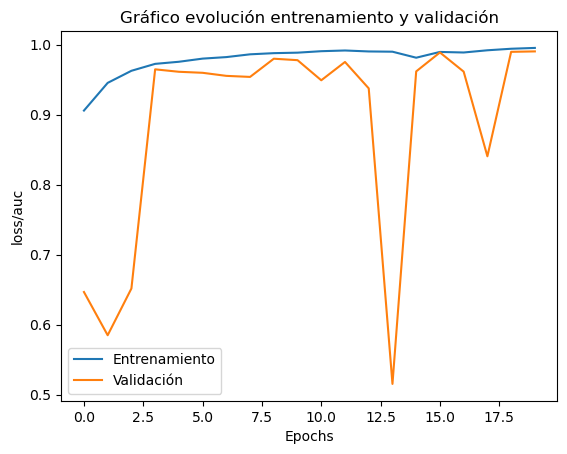

In [21]:
directorio_historico = './Historicos/historico_alexnet_arqu_batchsize/hist_alexNet_Simple3_64.csv' # cambiar directorio en caso que se emplee otro csv
metrica_entrenamiento = 'auc' 
metrica_validacion = 'val_auc' 

graf_mejor_modelo_auc=grafica(directorio_historico, metrica_entrenamiento, metrica_validacion)

#### Gráfica con la métrica loss para el mejor modelo

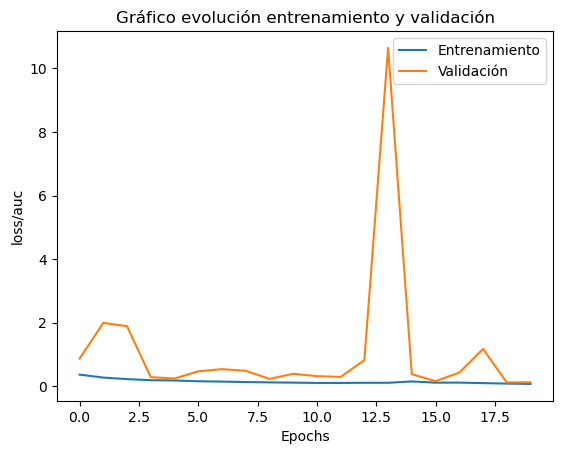

In [22]:
directorio_historico = './Historicos/historico_alexnet_arqu_batchsize/hist_alexNet_Simple3_64.csv' # cambiar directorio en caso que se emplee otro csv
metrica_entrenamiento = 'loss' 
metrica_validacion = 'val_loss' 

graf_mejor_modelo_loss=grafica(directorio_historico, metrica_entrenamiento, metrica_validacion)

## Matriz de confusión para ver como evoluciona del modelo más simple inicial al modelo final

Finalmente, se obtiene la matriz de confusión para el modelo inicial (más simple) y el modelo final obtenido.

In [23]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

def matriz_conf(ruta, batch_size, target_size, epochs, modelo, titulo):
    
    '''
    Función que crea una matriz de confusión a partir de la carga de un modelo dentro de la carpeta ''Modelos''.
    ----------------------------------------------------------------
    Parámetros:
    - ruta: str. Ruta base donde se encuentran las imágenes organizadas en subcarpetas (train, val, test). Ruta data_nuevo
    - batchsize: int. Tamaño del lote que se utiliza en una única iteración del algoritmo de aprendizaje
    - target_size: tupla de números enteros que representa el alto y ancho al que se van a redimensionar todas las imágenes. 
    - epochs: int. Número de épocas a entrenar
    - modelo: modelo previamente entrenado y almacenado dentro de la carpeta ''Modelos'' del cual se quiere obtener la matriz de confusión.
    - titulo: str. Título que se quiere asignar a la matriz de confusión
    -----------------------------------------------------------
    Return:
    - nada
    '''

    #se genera los datos
    train_generator, validation_generator, test_generator = preparar_modelo(ruta, batch_size, target_size)
    
    # se calcula y_test e y_pred del modelo pasado como parámetro para obtener la matriz de confusion
    y_test=test_generator.labels
    y_pred=modelo.predict(test_generator)
    y_pred_bin=np.where(y_pred>=0.5,1,0) #para convertirlo en un problema binario
    
        
    # matriz de confusión visualmente
    labels=np.unique(y_test)
        
    matriz_conf = metrics.confusion_matrix(y_test, y_pred_bin,labels=labels)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_conf, display_labels = ["NORMAL" , "PNEUMONIA"])
    fig, ax = plt.subplots(figsize=(5,5))
    cm_display.plot(ax=ax)
    plt.title(titulo)
    plt.show()

#### Matriz de confusión inicial

Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
147/147 [==============================] - 30s 205ms/step


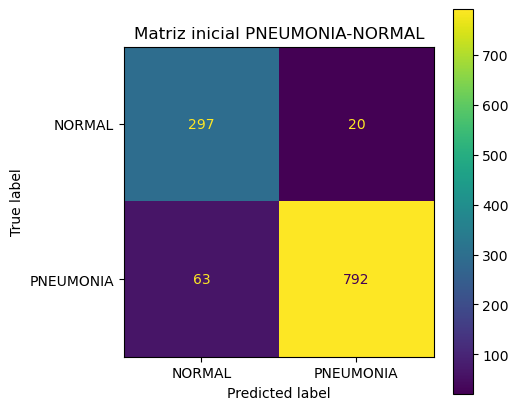

In [24]:
ruta='C:/Users/nuria/Downloads/TFG/data_nuevo' 
batch_size=8 
target_size=(150,150) #porque se emplea la CNN propia
epochs=20
modelo=keras.models.load_model('./Modelos/modelo_propia_arqu_batchsize/modelo_propia_Simple1_8.h5') 
titulo="Matriz inicial PNEUMONIA-NORMAL"

matriz_conf(ruta, batch_size, target_size, epochs, modelo, titulo)

#### Matriz de confusión final

Found 3747 images belonging to 2 classes.
Found 937 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
19/19 [==============================] - 38s 2s/step


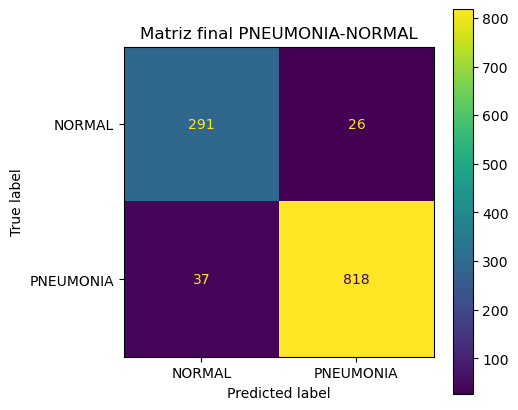

In [26]:
ruta='C:/Users/nuria/Downloads/TFG/data_nuevo' #directorio donde se encuentra la nueva carpeta creada con las imágenes
batch_size=64 
target_size=(340,340) #porque se emplea la CNN de AlexNet
epochs=20
#se indica la ruta donde está el modelo que se quiere emplear (CAMBIAR EN CASO DE MODIFICAR LA RUTA)
modelo=keras.models.load_model('./Modelos/modelo_alexnet_arqu_batchsize/modelo_alexnet_Simple3_64.h5') 
titulo="Matriz final PNEUMONIA-NORMAL"

matriz_conf(ruta, batch_size, target_size, epochs, modelo, titulo)